## Difracción en python

$$
    \left(\nabla^2 - \frac{1}{c^2} \frac{\partial^2 }{\partial t^2}\right) U(x, y, z, t) = 0
$$

Donde $|U|^2$ es la intensidad de la luz. A veces se puede asociar la intensidad de la luz con el módulo del campo electrico.

Suponiendo que tenemos luz monocromática de frecuencia angular $w = 2\pi f$ podemos buscar soluciones de la siguiente forma: $U(x, y, z, t) = u(x, y, z)e^{-iwt}$. Esto nos lleva a una ecuación de Hemholtz:

$$
    \nabla^2 u + k^2u = 0 \quad k = \frac w c = \frac {2\pi}{\lambda}
$$

Podemos buscar soluciones separables: $u(x, y, z) = f_x(x)\times f_y(y)\times f_z(z)$, lo que nos lleva a tres ecuaciones para cada una de las funciones $f$:

$$
    \frac{d^2}{dx^2} f_x(x) + k_x^2f_x(x) = 0  \\
    \frac{d^2}{dy^2} f_y(y) + k_y^2f_y(y) = 0  \\
    \frac{d^2}{dz^2} f_z(z) + k_z^2f_z(z) = 0  
$$

Junto con la condición: $k^2 = k_x^2 + k_y^2 + k_z^2$. Las soluciones de estas ecuaciones seran senos y cosenos o de forma equivalente una exponencial compleja. Volviendo a la función $u$, que pasaremos a denotar $u_s$ al ser una de las posibles soluciones separables, tenemos:

$$
    u_s(x, y, z) = Ae^{ik_x x}e^{ik_y y}e^{ik_z z} = A e^{i(k_x x + k_y y )} e^{\pm z \sqrt{k^2 - k_x^2 - k_y^2}}
$$

Hemos resuelto $k_z$ para liberarnos de una de las $k_i$. Con $A$ compleja en general. Sabemos que esta solución $u_s$ es solo una de las posibles, para encontrar la solución más general debemos construir una combinación lineal de todas las posibles soluciones con diferentes $k_x$ y $k_y$. Esto lo podemos hacer con una integral:

$$
    u(x, y, z) = \int_{-\infty}^\infty \int_{-\infty}^\infty dk_x dk_y u_s(x, y, z, k_x, k_y)
$$

Podemos desarrollar esta ecuación teniendo en cuenta que la constante $A$ dependerá de $k_x$ y $k_y$:

$$
    u(x, y, z) = \int_{-\infty}^\infty \int_{-\infty}^\infty dk_x dk_y A(k_x, k_y) e^{i(k_x x + k_y y )} e^{\pm z \sqrt{k^2 - k_x^2 - k_y^2}}
$$

Entonces en $z = 0$ tenemos:

$$
    u(x, y, 0) = \int_{-\infty}^\infty \int_{-\infty}^\infty dk_x dk_y A(k_x, k_y) e^{i(k_x x + k_y y )}
$$

Podemos entonces reconocer que $u$ y $A$ están relacionados por una transformada de fourier: 

$$
    \boxed{A(k_x, k_y) = \mathcal{F}[u(x, y, 0)]}
$$

$A$ es la transformada de fourier de $u(x, y, z)$ en $z = 0$. De forma más general podemos escribir:

$$
    \boxed{u(x, y, z) = \mathcal{F}^{-1}[A(k_x, k_y)e^{- z \sqrt{k^2 - k_x^2 - k_y^2}}]}
$$

Donde hemos escogido el signo menos para tener ondas que se propagan en z positivo. Utilizando las dos expresiones en cajas podremos resolver el problema de propagación de luz suponiendo que sabemos la longitud de onda (o k), la velocidad de la luz y $u(x, y, z)$ en $z = 0$. (La intensidad de la luz en z=0 es la apertura con la que estamos trabajando, por ejemplo una apertura cuadrada)

In [1]:
import numpy as np
import scipy as sp

from scipy.fft import fft2, ifft2, fftfreq, fftshift

import matplotlib.pyplot as plt

### Ejemplo 1 - Apertura rectangular

Primero definimos los parámetros del problema y las condiciones iniciales de U

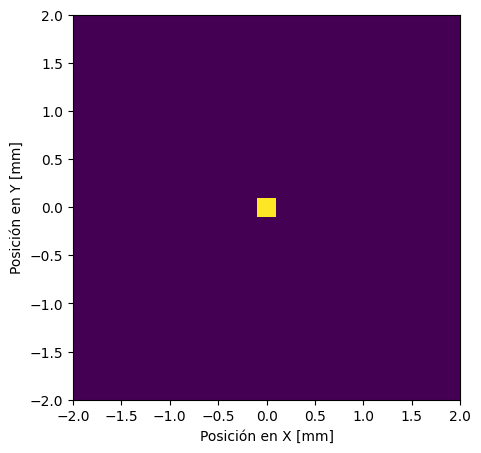

In [2]:
# Parámetros del problema
anchura = 0.2 # 0.1 # mm 
longitud_onda = 660*1e-6 # mm

x = np.linspace(-2, 2, 1600)
xv, yv = np.meshgrid(x, x)

# Condiciones iniciales (fórma de la apertura)
#U0 = (np.abs(xv) < anchura/2)*(np.abs(yv) < 0.5)
U0 = (np.abs(xv) < anchura/2)*(np.abs(yv) < 0.1)

plt.figure(figsize=(5, 5))
plt.pcolormesh(xv, yv, U0)
plt.xlabel("Posición en X [mm]")
plt.ylabel("Posición en Y [mm]")
plt.show()

Ahora calculamos los coeficientes A(k_x, k_y) iniciales. Tambien crearemos una meshgrid de k_x, k_y. 


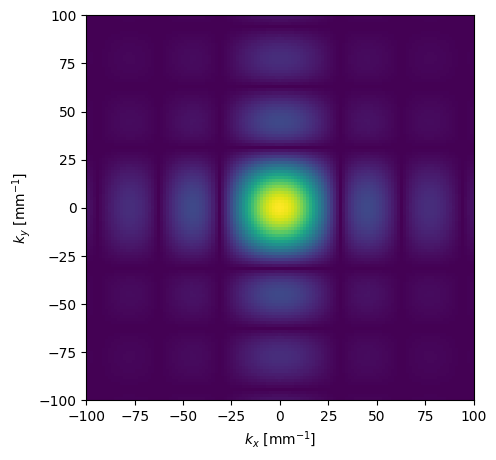

In [3]:
A = fft2(U0)

kx = fftfreq(len(x), np.diff(x)[0])*2*np.pi # queremos la frecuencia angular, por lo que multiplicamos por 2pi
kxv, kyv = np.meshgrid(kx, kx)

plt.figure(figsize=(5, 5))
plt.pcolormesh(fftshift(kxv), fftshift(kyv), np.abs(fftshift(A)))
plt.xlabel("$k_x$ [mm$^{-1}$]")
plt.ylabel("$k_y$ [mm$^{-1}$]")
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.show()

Con los coeficientes ya calculados podemos calcular $U$ a cualquier distancia con la transformada de fourier inversa.

In [4]:
def get_U(z, k):
    return ifft2(A*np.exp(1j*z*np.sqrt(k**2 - kxv**2 - kyv**2)))

Ahora solo nos queda especificar la distanicia a la que queremos ver la interferencia y espeicficar $k$, que podemos calcular de la longitud de onda.

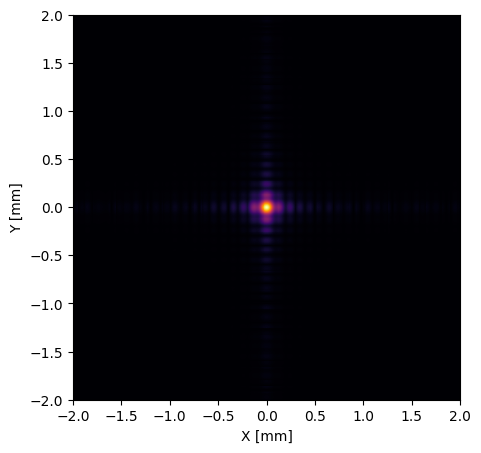

In [5]:
k = 2*np.pi/longitud_onda
d = 30 # mm

U = get_U(d, k)

plt.figure(figsize=(5, 5))
plt.pcolormesh(xv, yv, np.abs(U), cmap="inferno")
plt.xlabel("X [mm]")
plt.ylabel("Y [mm]")
plt.show()

Podemos resumir todo lo que hemos hecho en una sola función

In [6]:
def compute_U(U0, x, longitud_onda, z):
    A = fft2(U0)
    kx = fftfreq(len(x), np.diff(x)[0])*2*np.pi
    kxv, kyv = np.meshgrid(kx, kx)
    k = 2*np.pi/longitud_onda
    return ifft2(A*np.exp(1j*z*np.sqrt(k**2 - kxv**2 - kyv**2)))

### Ejemplo 1: apertura cuadrada

In [7]:
x = np.linspace(-2, 2, 1600)
xv, yv = np.meshgrid(x, x)

anchura = 0.2 # mm 
longitud_onda = 660*1e-6 # mm
distancia = 50 # mm

U0 = (np.abs(xv) < anchura)*(np.abs(yv) < 0.2)
U = compute_U(U0, x, longitud_onda, distancia)

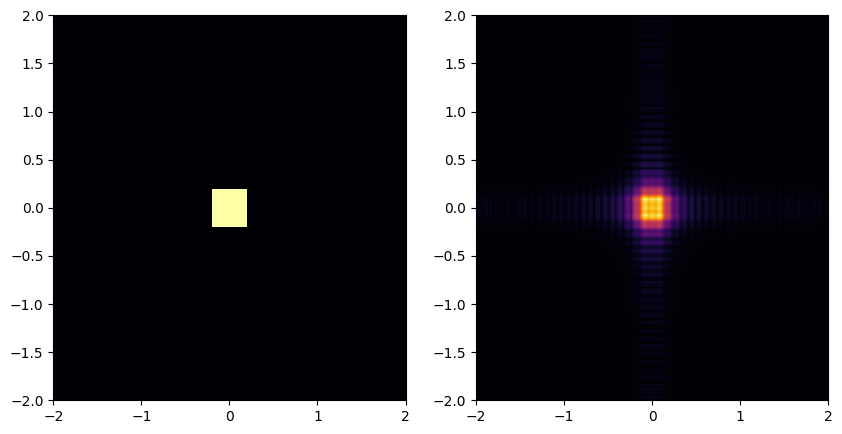

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].pcolormesh(xv, yv, np.abs(U0), cmap="inferno")
ax[1].pcolormesh(xv, yv, np.abs(U), cmap="inferno")
plt.show()

### Ejemplo 2 : Apertura circular

In [9]:
x = np.linspace(-2, 2, 1600)
xv, yv = np.meshgrid(x, x)

radio = 0.1 # mm
longitud_onda = 660*1e-6 # mm
distancia = 100 # mm

U0 = xv**2 + yv**2 < radio**2
U = compute_U(U0, x, longitud_onda, distancia)

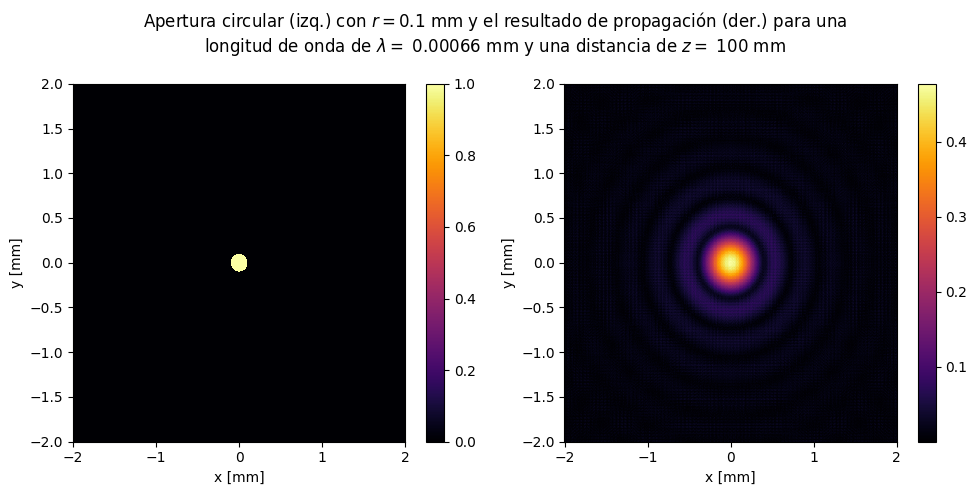

In [23]:
# Comparar con https://en.wikipedia.org/wiki/Airy_disk
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
mappable1 = ax[0].pcolormesh(xv, yv, np.abs(U0), cmap="inferno")
mappable2 = ax[1].pcolormesh(xv, yv, np.abs(U), cmap="inferno")

# https://matplotlib.org/stable/gallery/color/colorbar_basics.html#sphx-glr-gallery-color-colorbar-basics-py
fig.colorbar(mappable=mappable1, ax=ax[0])
fig.colorbar(mappable=mappable2, ax=ax[1])

ax[0].set_xlabel("x [mm]")
ax[0].set_ylabel("y [mm]")

ax[1].set_xlabel("x [mm]")
ax[1].set_ylabel("y [mm]")

fig.suptitle("Apertura circular (izq.) con " + r"$r=$" + f"{radio} mm y el resultado de propagación (der.) para una\nlongitud de onda de " + r"$\lambda = $" + f" {longitud_onda} mm y una distancia de " + r"$z = $" + f" {distancia} mm")
fig.tight_layout()

plt.savefig("figures/ejemplo_diff.png")

### Ejemplo 3 : Apertura "coronal"

Probemos con una apertura con forma de corona circular

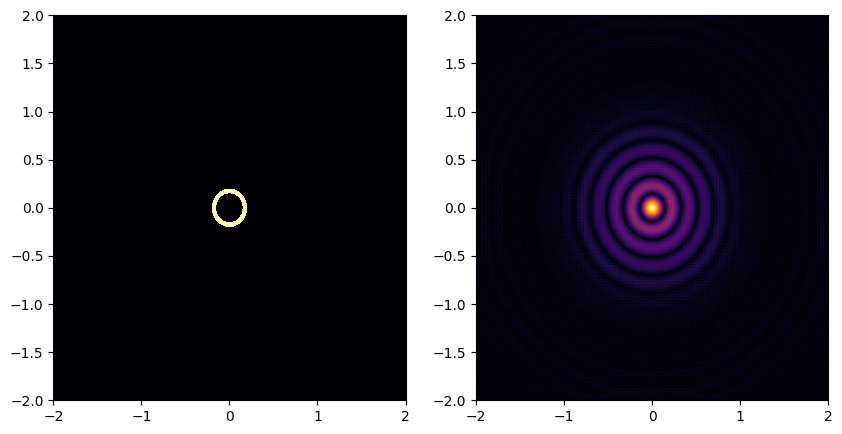

In [9]:
# Parámetros

radio_interno = 0.15 ## mm
radio_externo = 0.2 ## mm
longitud_onda = 660*1e-6 # mm
distancia = 100 ## mm

x = np.linspace(-2, 2, 1600)
xv, yv = np.meshgrid(x, x)
U0 = (xv**2 + yv**2 < radio_externo**2) & (radio_interno**2 < xv**2 + yv**2) # & es una operación and
U = compute_U(U0, x, longitud_onda, distancia)

# Representación

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].pcolormesh(xv, yv, np.abs(U0), cmap="inferno")
ax[1].pcolormesh(xv, yv, np.abs(U), cmap="inferno")
plt.show()

### Ejemplo 4 : doble rendija circular

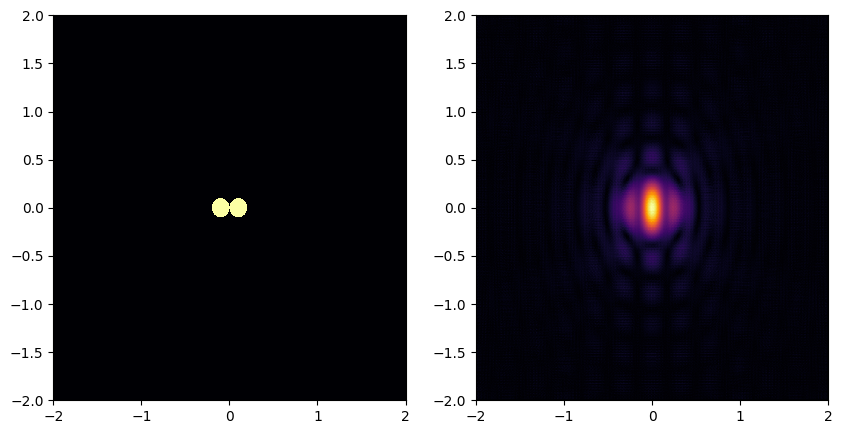

In [10]:
x = np.linspace(-2, 2, 1600)
xv, yv = np.meshgrid(x, x)

radio = 0.1 # mm
longitud_onda = 660*1e-6 # mm
separacion = 0.2
distancia = 100 # mm

U0 = ((xv - separacion/2)**2 + yv**2 < radio**2) + ((xv + separacion/2)**2 + yv**2 < radio**2)
U = compute_U(U0, x, longitud_onda, distancia)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].pcolormesh(xv, yv, np.abs(U0), cmap="inferno")
ax[1].pcolormesh(xv, yv, np.abs(U), cmap="inferno")
plt.show()

### Ejemplo 4 : Colección de "átomos"

Terminada U0
Terminada U


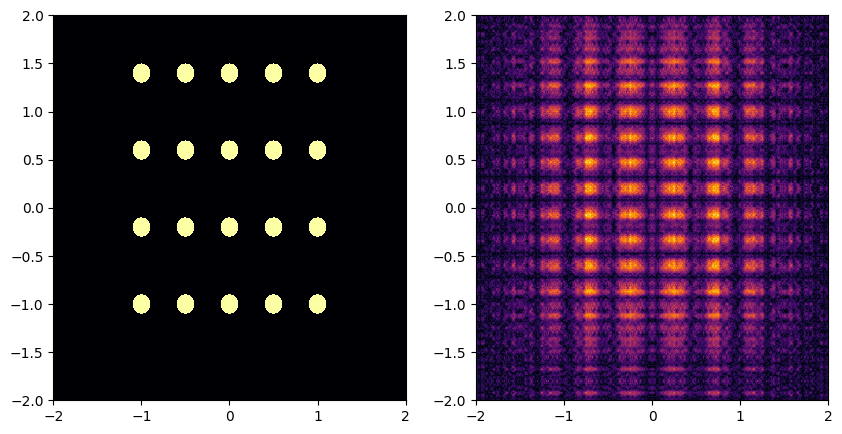

In [13]:
# Parámetros

radio_atomo = 0.1 # mm
a_1 = 0.5 # mm
a_2 = 0.8 # mm
longitud_onda = 660*1e-6 # mm
distancia = 300 # mm

x = np.linspace(-2, 2, 1600*2)
xv, yv = np.meshgrid(x, x)

U0 = np.zeros((len(x), len(x)))

b = 0.5

for i in np.arange(-b, b+a_1, a_1): # Probablemente se pueda hacer la colección de atomos de una mejor forma
    for j in np.arange(-b, b+a_2, a_2):
        U0 += (xv - i)**2 + (yv - j)**2 < radio_atomo**2

#U0 = np.logical_not(U0)

print("Terminada U0")

U = compute_U(U0, x, longitud_onda, distancia)

print("Terminada U")

# Representación

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].pcolormesh(xv, yv, np.abs(U0), cmap="inferno")
ax[1].pcolormesh(xv, yv, np.abs(U), cmap="inferno")
plt.show()

### Ejemplo 5: Red de difracción

Terminada U0


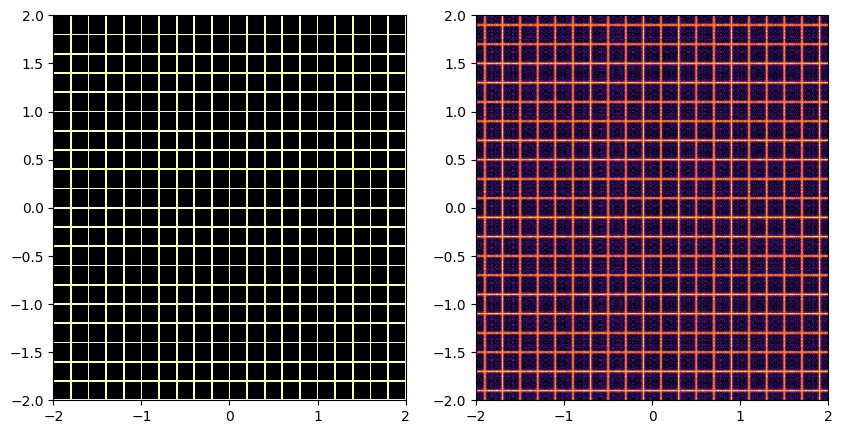

In [23]:
# Parámetros

anchura = 0.01 # mm
dist_ranuras = 0.2 # mm
longitud_onda = 660*1e-6 # mm
distancia = 2000 # mm

x = np.linspace(-2, 2, 1600*3)
xv, yv = np.meshgrid(x, x)

U0 = np.zeros((len(x), len(x)))

for i in np.arange(-2, 2+dist_ranuras, dist_ranuras):
    U0 = np.logical_or(U0, (abs((xv - i)) < anchura)*(abs(yv) < 2))

for i in np.arange(-2, 2+dist_ranuras, dist_ranuras):
    U0 = np.logical_or(U0, (abs((yv - i)) < anchura)*(abs(xv) < 2))

#U0 = np.logical_not(U0)

print("Terminada U0")

U = compute_U(U0, x, longitud_onda, distancia)

# Representación

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].pcolormesh(xv, yv, np.abs(U0), cmap="inferno")
ax[1].pcolormesh(xv, yv, np.abs(U), cmap="inferno")
plt.show()